---

#  Mplfinance Used To Plot Awesome Oscillator

---

### What Is The Awesome Oscillator
- The aptly named Awesome Oscillator is an amazing  designed to measure the underlying  as well as to confirm trends and anticipate reversals.

- The Awesome Oscillator was developed by the legendary chartist Bill Williams, who described it as the ‘best momentum indicator’ that is ‘as simple as it is elegant’.

- The Awesome Oscillator is based on a combination of , but its ‘awesomeness’ is illustrated by the clear and straightforward  that it generates.

- As its name suggests, the Awesome Oscillator belongs to the broader group of oscillators, which consists of indicators such as the ,  and . But while most oscillators usually swing between defined values such as ‘0 to 100’ or ‘-100 to +100’, the Awesome Oscillator is unbounded.

- Other popular  include the Accelerator Oscillator, Fractals, Gator Oscillator, Alligator and the Market Facilitation Index.


---

### mplfinance 'yahoo' styles was used to customize Awesome Oscillator:
- Type of Plot Use `candle`
- Awesome Oscillator Build With Histogram Bar
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- panel
- Bar Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [1]:
import pandas as pd
import mplfinance as mpf

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
idf = pd.read_csv('data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---
- **Calculating the Awesome Indicator**
- The formula to calculate the Awesome Oscillator is as follows:

- Awesome Oscillator = SMA (MEDIAN PRICE, 5)-SMA (MEDIAN PRICE, 34)

- Where:

- SMA = simple moving average

- Median Price = (HIGH+LOW)/2
- **Here is Function For The Calculation:**

---

In [4]:
#Calculation For Simple Moving Average For Length 34 as Long SMA
df['SMA34'] = df['Close'].rolling(window=34).mean()

In [5]:
#Calculation For Simple Moving Average For Length 5 as Short SMA
df['SMA5'] = df['Close'].rolling(window=5).mean()

In [6]:
# Awesome_Oscillator Column Assign To df
df['AO'] = df['SMA5'] - df['SMA34']

### Function For Generate Color Awesome_oscillator

In [7]:
def generate_awesome_oscillator_color(df):
    awesome_oscillator_color = []
    awesome_oscillator_color.clear()
    for i in range (0,len(df["AO"])):
        if df["AO"][i] >= 0 and df["AO"][i-1] < df["AO"][i]:
            awesome_oscillator_color.append('#26A69A')
            #print(i,'green')
        elif df["AO"][i] >= 0 and df["AO"][i-1] > df["AO"][i]:
            awesome_oscillator_color.append('#FF5252')
            #print(i,'faint green')
        elif df["AO"][i] < 0 and df["AO"][i-1] > df["AO"][i] :
            #print(i,'red')
            awesome_oscillator_color.append('#FF5252')
        elif df["AO"][i] < 0 and df["AO"][i-1] < df["AO"][i] :
            #print(i,'faint red')
            awesome_oscillator_color.append('#26A69A')
        else:
            awesome_oscillator_color.append('#000000')
    return awesome_oscillator_color

In [8]:
# List of Color Assiging To Awesome Oscillator
awesome_oscillator_color = generate_awesome_oscillator_color(df)

In [9]:
# Data Extracted And New Variable Applied
awesome_oscillator = df[['AO']]

Let's add a new panel containing Histogram.

By default addplot uses Panel 0 For Main Candlestick.

In [10]:
ao = [
    mpf.make_addplot(awesome_oscillator,type='bar',width=0.7,color=awesome_oscillator_color,panel=1,alpha=1,secondary_y=True)
]

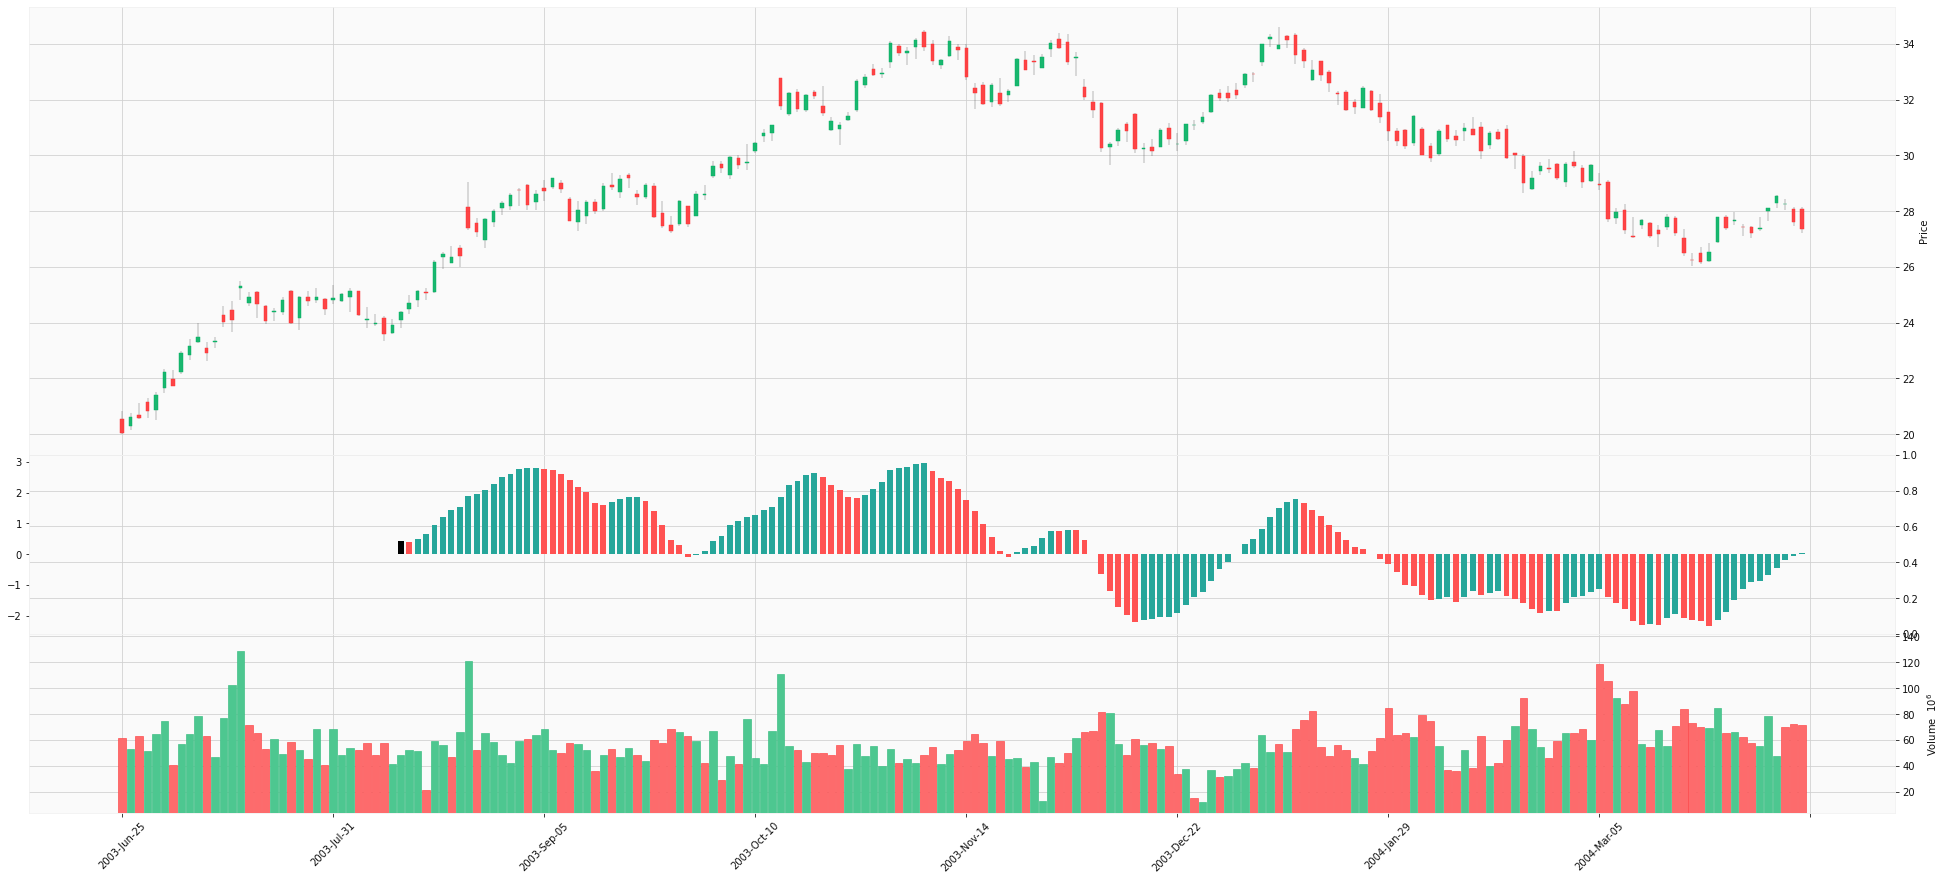

In [11]:
mpf.plot(
    df,
    volume=True,
    volume_panel = 2,
    type="candle", 
    style="yahoo",
    addplot=ao,
    figscale=1.2,
    figsize=(36,16,)
)